# Recreate plots from Francis & Vavrus 2015: 
- Paper citation: Jennifer A Francis and Stephen J Vavrus 2015 Environ. Res. Lett. 10 014005
- Link to paper: https://iopscience.iop.org/article/10.1088/1748-9326/10/1/014005#erl507077bib8

## Plot 1: Annual-mean anomalies in air temperature for 40–80°N (recreating figure 1a from Francis & Vavrus)
- "Annual anomaly" is defined as the difference in annual mean relative to the **1989-2018 mean** (30 years)
    - Note that this is updated from Francis & Vavrus' available data from 1981–2010 (30 years)
- Anomalies in air temperature are calculated for each year from **2003 through 2021** (19 years) and averaged to get annual-mean anomalies which are plotted by latitude and elevation. 
    - Note that this is updated from Francis & Vavrus' anomalies calculatued for 1995 through 2013 (19 years).
- Thus, all data ranges have been shifted forward 8 years

In [1]:
import xarray as xr
from glob import glob

### Read in pre-computed annual means from local net cdf files
#### Recall the reference code was included in section "CFSR_data" above

In [2]:
# Define the parent dir where annual temp data lives
dir_annual_t = '/home11/grad/2021/cs436778/general-circulation/project/data/annual/'

# Define the years of data to read in. As discussed above, we will read in 2002 through 2021
years_calc = range(2003, 2022)
years_relative = range(1989, 2019)

In [3]:
# List all files from parent dir with the years defined
t_files_years_calc = []
for year in years_calc: 
    t_files_years_calc.append(f"{dir_annual_t}annual_t_{year}.nc")
    
# List all files from parent dir with the years defined
t_files_years_relative = []
for year in years_relative: 
    t_files_years_relative.append(f"{dir_annual_t}annual_t_{year}.nc")

In [4]:
# Read in datasets using dask

ds_years_calc = xr.open_mfdataset(t_files_years_calc, chunks={'time':30*4, 'lev': 4}, parallel=True)
ds_years_relative = xr.open_mfdataset(t_files_years_relative, chunks={'time':30*4, 'lev': 4}, parallel=True)

In [5]:
ds_years_calc

,Array,Chunk
Bytes,857.38 kiB,5.64 kiB
Shape,"(32, 361, 19)","(4, 361, 1)"
Count,39 Graph Layers,152 Chunks
Type,float32,numpy.ndarray


In [6]:
ds_years_relative

,Array,Chunk
Bytes,1.32 MiB,5.64 kiB
Shape,"(32, 361, 30)","(4, 361, 1)"
Count,61 Graph Layers,240 Chunks
Type,float32,numpy.ndarray


#### Calculate mean temp 1989 - 2018 to be used as relative temp in anomaly calculation


In [7]:
t_rel = ds_years_relative.mean(dim=('year'))

t_rel

<xarray.Dataset>
Dimensions:  (lev: 32, lat: 361)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
Data variables:
    t        (lev, lat) float32 dask.array<chunksize=(4, 361), meta=np.ndarray>

#### Calculate mean temp for 2003 - 2021
- Note: It's more intuitive to think about the "annual mean anomalies" by finding each year's (from 2003 to 2021) temp anomaly and then averaging, but calculation-wise, it's equivalent (and simpler) to find the 2003-2021 mean temperature and subtracting from the 1989-2018 relative mean. 

In [8]:
t_calc = ds_years_calc.mean(dim=('year'))

t_calc

<xarray.Dataset>
Dimensions:  (lev: 32, lat: 361)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
Data variables:
    t        (lev, lat) float32 dask.array<chunksize=(4, 361), meta=np.ndarray>

#### Calculate the annual-mean anomalies in air temperature by subtracting the two mean datasets created above

In [9]:
t_anom = t_calc - t_rel

#### Subset anomaly dataset to latitudes of interest: 40N - 80N

In [10]:
t_anom = t_anom.sel(lat=slice(40,80))

#### Plot annual-mean temperature anomalies 
- Reformat into a data array for easy plotting

In [11]:
t_anom_da = t_anom.to_array(dim='t').squeeze(dim=["t"], drop = True)

In [12]:
t_anom_da

<xarray.DataArray (lev: 32, lat: 81)>
dask.array<getitem, shape=(32, 81), dtype=float32, chunksize=(4, 81), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 40.0 40.5 41.0 41.5 42.0 ... 78.0 78.5 79.0 79.5 80.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0

In [18]:
# import numpy as np
# levs = np.arange(-0.50, 1.0, 0.1)
# levs

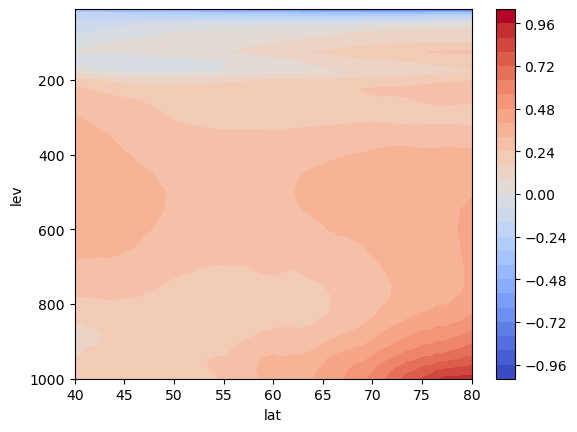

In [17]:
xr.plot.contourf(t_anom_da, x = 'lat', y = 'lev', levels = 30, yincrease=False, cmap = 'coolwarm')

# Plot 2: To do....
- need seasonal climatologies or just the seasonal means by year?

### ... if need
### Read in pre-computed 30-year climatologies from local net cdf files
#### Source notebook used for computing these means: UAlbany ATM622 computing-seasonal.ipynb

In [15]:
dir_clim = '/cfsr/data/2017/pmsl.2017.0p5.anl.nc'
ds_clim = xr.open_mfdataset(dir_clim , chunks={'time':30*4, 'lev': 4}, parallel=True)

In [16]:
ds_clim

<xarray.Dataset>
Dimensions:  (time: 1460, lat: 361, lon: 720)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01 ... 2017-12-31T18:00:00
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
Data variables:
    pmsl     (time, lat, lon) float32 dask.array<chunksize=(120, 361, 720), meta=np.ndarray>
Attributes:
    description:    pmsl as a single level variable
    year:           2017
    source:         http://nomads.ncdc.noaa.gov/data.php?name=access#CFSR-data
    references:     Saha, et. al., (2010)
    created_by:     User: ab473731
    creation_date:  Mon Jan  2 06:03:28 UTC 2017